In [1]:
import data
import preprocessing
import exportation
import settings

import joblib

import matplotlib.pyplot as plt
import matplotlib as mplt
import seaborn as sns
import pandas as pd
import numpy as np


# *****************************************************************
# ------------------------ Program parameters ---------------------
# *****************************************************************

enseigne = 'Auchan'

# Exploration des données d'entrainement

In [2]:
df = data.data_extraction.BDD_Promo('BigQuery', enseigne)


Querying BigQuery for training data...
Querying and loading time = 125.47 s 
Request finished



In [3]:
#Data Cleaning
df_clean,id_cols = preprocessing.training_set_preprocessing.training_set_cleaning(df)

print('Dataframe shape :', df_clean.shape)

Cleaning Data...
Data cleansing done

Dataframe shape : (217430, 33)


In [4]:
df_clean.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Confirmation,217430,1,Acceptée,217430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annee,217430,3,2019-01-01,79494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SemaineDebut,217430,NaN,NaN,NaN,26.183,15.2496,1,12,27,41,52
NomOpe,217430,128,GRAND RDV 6,12494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DateDebutConso,217430,123,2017-11-03,12494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DateFinConso,217430,122,2017-11-09,12494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Enseigne,217430,1,AUCHAN,217430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DirectionRegionale,217430,4,DFR DR NORD EST,95227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZoneCVR,217430,23,DFR CVR 21,27522,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SecteurCM,217430,58,TERRITOIRE 2220,9158,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
if 'AUCHAN' in df_clean.Enseigne.unique():
      df_clean.drop(['CodeLot'], axis = 1)

In [6]:
df_clean.isna().sum()

Confirmation                       0
Annee                              0
SemaineDebut                       0
NomOpe                             0
DateDebutConso                     0
DateFinConso                       0
Enseigne                           0
DirectionRegionale                 0
ZoneCVR                            0
SecteurCM                          0
NomMagasin                         0
Superficie                      5513
CodeMagasin                        0
CAMagasin                          0
IndiceMagPromophile                0
CodeSAPProduit                     0
EANProduit                         0
NomProduit                         0
UmbrellaBrand                      0
NBPotsParUC                        0
FlagInno                           0
DureeEnJoursDepuisLancement        0
TotalVentesMarqueUC             1673
IndiceMarquePromophile          1673
Mecanique                          0
EncodageMecaniquePromo          7241
PreviUCRetouche                38118
C

## Visualisation

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

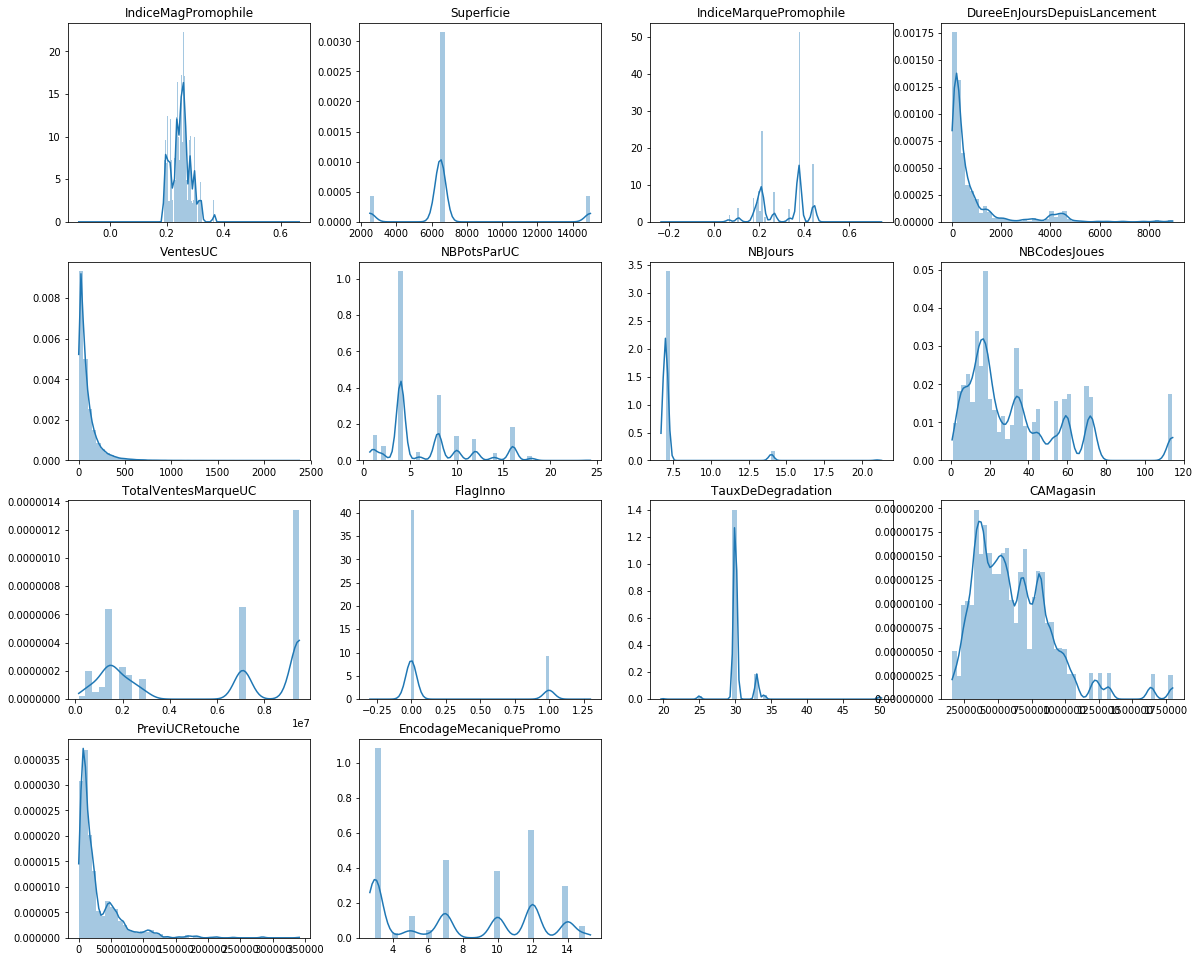

In [7]:
fig = plt.figure
fig(figsize =(20,30))
i=0

df_clean = df_clean.dropna()

for col in set(df_clean.columns) - set(id_cols):
    plt.subplot(7, 4, i + 1)
    plt.title(col)
    sns.distplot(df_clean[[col]] , kde_kws = {'bw':0.1})
    i+=1

plt.tight_layout

## Analyse de Correlation

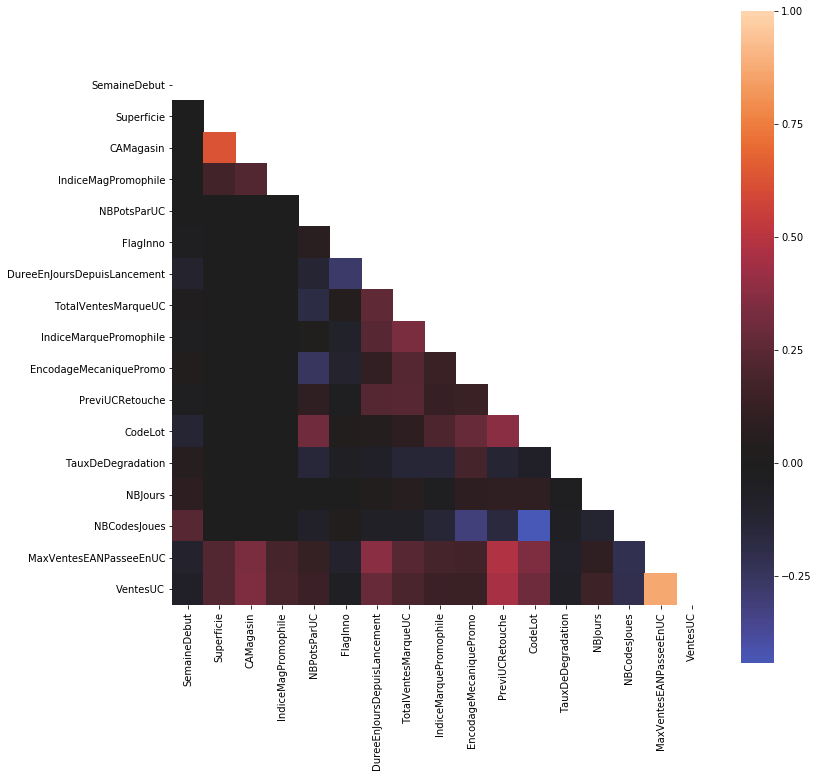

In [8]:
X_corr = df_clean.corr()
mask = np.zeros_like(X_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize = (12,12))

sns.heatmap(X_corr, center=0, square = True, mask = mask)

## Création du DataFrame encodée et transformé pour entrainement

In [9]:
df_transform = preprocessing.training_set_preprocessing.data_forward_transform(df_clean)

df_transform.describe(include = 'all').transpose()

Transforming skewed columns for Normal distribution approximation...


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Confirmation,169189,1,Acceptée,169189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annee,169189,3,2019-01-01,77464,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SemaineDebut,169189,NaN,NaN,NaN,26.5575,15.0998,1,13,27,41,52
NomOpe,169189,114,OCTOBRE N° 4 Tract - 2019,7504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DateDebutConso,169189,109,2019-10-23,7504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DateFinConso,169189,108,2019-09-10,9447,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Enseigne,169189,1,AUCHAN,169189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DirectionRegionale,169189,4,DFR DR NORD EST,71673,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZoneCVR,169189,23,DFR CVR 21,21969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SecteurCM,169189,57,TERRITOIRE 2220,7321,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

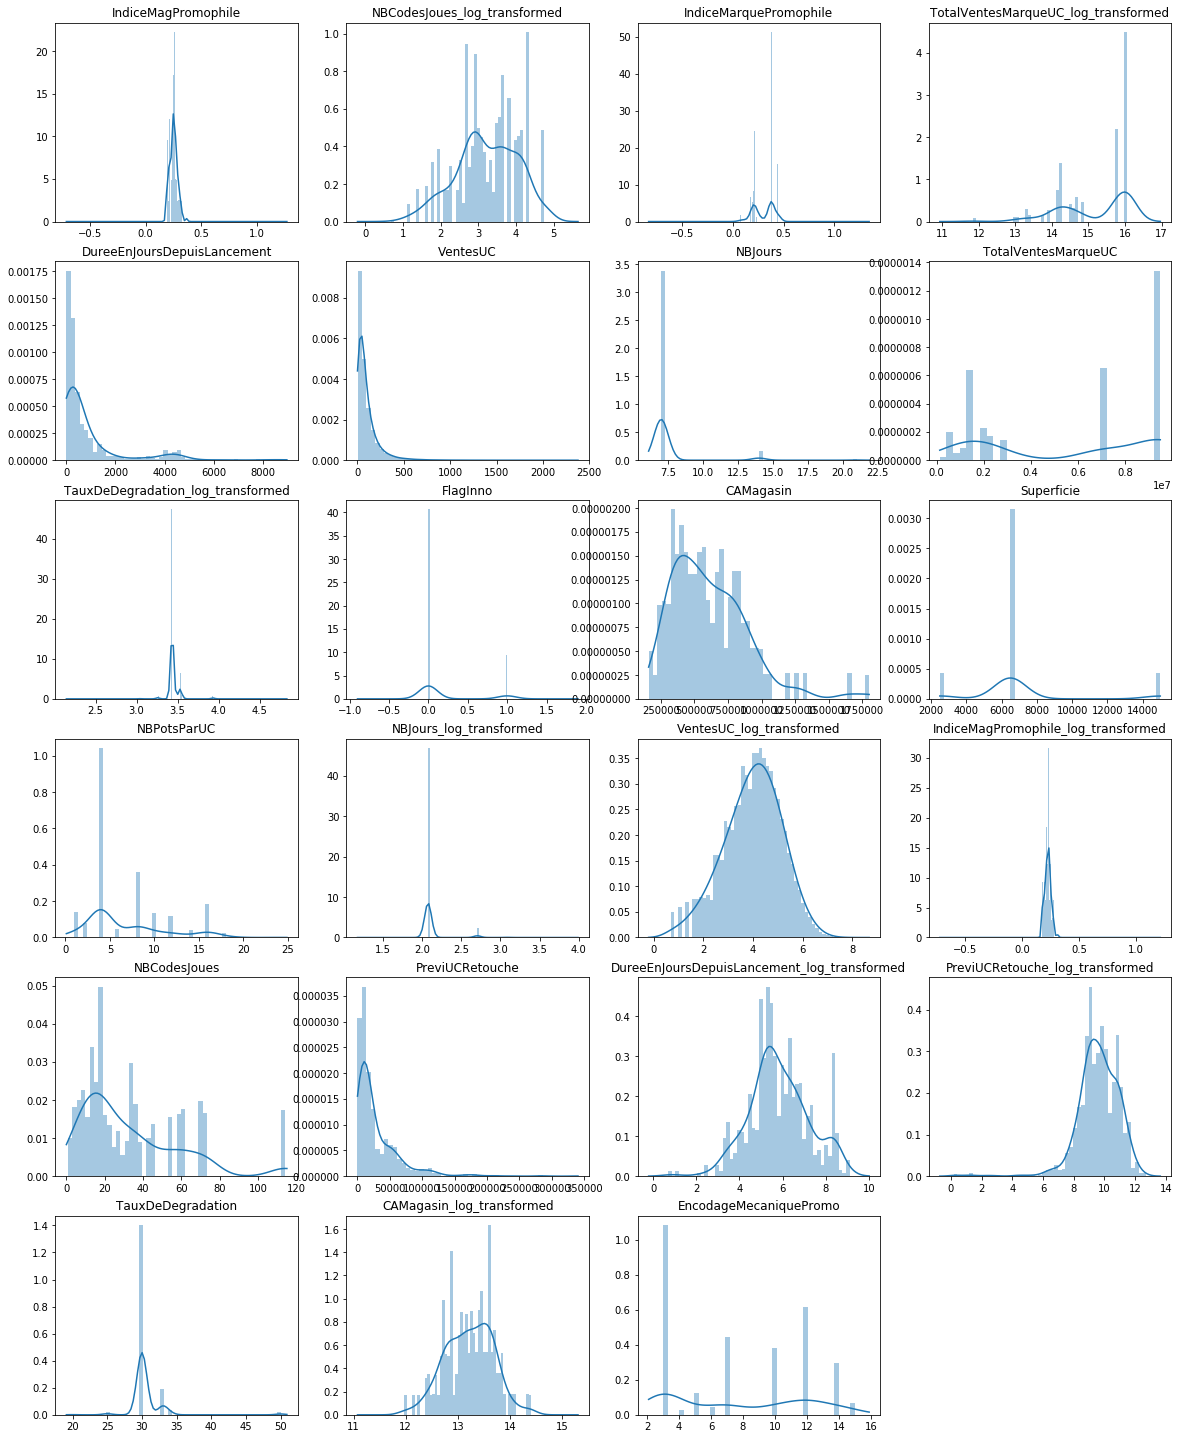

In [10]:
fig = plt.figure
fig(figsize =(20,30))
i=0
for col in set(df_transform.columns) - set(id_cols):
    plt.subplot(7, 4, i + 1)
    plt.title(col)
    sns.distplot(df_transform[[col]],  kde_kws={'bw':0.3})
    i+=1

plt.tight_layout

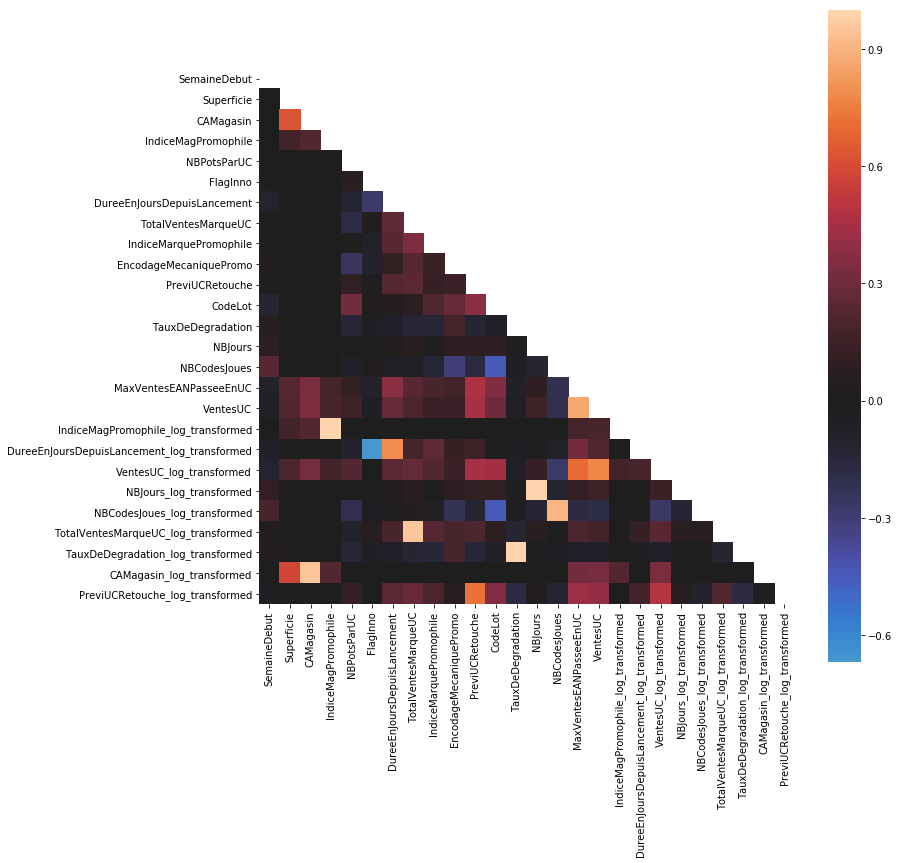

In [11]:
X_corr = df_transform.corr()
mask = np.zeros_like(X_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize = (12,12))

sns.heatmap(X_corr, center=0, square = True, mask = mask)

## Encodage des données catégoriques

In [12]:
df_encoded = preprocessing.training_set_preprocessing.feature_encoding(df_clean)

df_encoded.isna().sum()

Feature encoding...
Feature encoding done



Confirmation                                   0
Annee                                          0
SemaineDebut                                   0
NomOpe                                         0
DateDebutConso                                 0
DateFinConso                                   0
Enseigne                                       0
DirectionRegionale                             0
ZoneCVR                                        0
SecteurCM                                      0
NomMagasin                                     0
Superficie                                     0
CodeMagasin                                    0
CAMagasin                                      0
IndiceMagPromophile                            0
CodeSAPProduit                                 0
EANProduit                                     0
NomProduit                                     0
UmbrellaBrand                                  0
NBPotsParUC                                    0
FlagInno            

In [13]:
%matplotlib inline
from pdpbox import pdp, get_dataset, info_plots

ImportError: No module named 'pdpbox'

In [14]:
ross_data = df_encoded.copy()
ross_features = df_encoded.columns
ross_target = 'VentesUC_log_transformed'

In [15]:
ross_features

Index(['Confirmation', 'Annee', 'SemaineDebut', 'NomOpe', 'DateDebutConso',
       'DateFinConso', 'Enseigne', 'DirectionRegionale', 'ZoneCVR',
       'SecteurCM', 'NomMagasin', 'Superficie', 'CodeMagasin', 'CAMagasin',
       'IndiceMagPromophile', 'CodeSAPProduit', 'EANProduit', 'NomProduit',
       'UmbrellaBrand', 'NBPotsParUC', 'FlagInno',
       'DureeEnJoursDepuisLancement', 'TotalVentesMarqueUC',
       'IndiceMarquePromophile', 'Mecanique', 'EncodageMecaniquePromo',
       'PreviUCRetouche', 'CodeLot', 'TauxDeDegradation', 'NBJours',
       'NBCodesJoues', 'MaxVentesEANPasseeEnUC', 'VentesUC',
       'IndiceMagPromophile_log_transformed',
       'DureeEnJoursDepuisLancement_log_transformed',
       'VentesUC_log_transformed', 'NBJours_log_transformed',
       'NBCodesJoues_log_transformed', 'TotalVentesMarqueUC_log_transformed',
       'TauxDeDegradation_log_transformed', 'CAMagasin_log_transformed',
       'PreviUCRetouche_log_transformed'],
      dtype='object')

In [16]:
fig, axes, summary_df = info_plots.target_plot(         df=ross_data, 
                                                        feature='PreviUCRetouche_log_transformed', 
                                                        feature_name='PreviUCRetouche_log_transformed', 
                                                        target=ross_target,
                                                        show_percentile=True
                                                        )

NameError: name 'info_plots' is not defined